In [8]:
import astropy
import astroplan
import numpy as np

In [9]:
# Variables de control del programa
CLUSTER = False

## Leo los datos de ANTARES

In [10]:
names_antares = []
ra_antares = []
dec_antares = []

with open('PublicData_0717.dat.txt') as f:
    for index, line in enumerate(f):
        # Salto la cabecera
        if index==0:
            continue
        # Divido la line en espacios en blanco
        a = line.split()
        # Guardo los datos
        dec_antares.append(float(a[0])) # deg
        ra_antares.append(float(a[1]))  # deg
        names_antares.append(a[4])
        
# Lo transformo con astropy coordinates
antares = astropy.coordinates.SkyCoord(ra_antares, dec_antares, frame='icrs', unit='deg')

## Leo los datos del catálogo

In [11]:
names_cat = []
ra_cat = []
dec_cat = []

with open('rfc_2020d_cat.txt') as f:
    for index, line in enumerate(f):
        # Salto las lineas de cabecera
        if index<135:
            continue
        # Divido la linea por espacios en blanco
        a = line.split()
        # Selecciono las 'galaxias' con emision en x-band > 150 mJy y con una declnacion menor que 40º
        x_band = float(a[17])
        dec_cut = float(a[6])
        if x_band >=0.15:# and dec_cut<50.0:
            names_cat.append(a[2])
            ra_cat.append(a[3]+' '+a[4]+' '+a[5])  #  hr mn seconds
            dec_cat.append(a[6]+' '+a[7]+' '+a[8]) # deg mn seconds

# Lo transformo con astropy coordinates
cat = astropy.coordinates.SkyCoord(ra_cat, dec_cat, unit=(astropy.units.hourangle, astropy.units.deg))

## Dibujo las distribuciones

In [12]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'font.weight':1000})

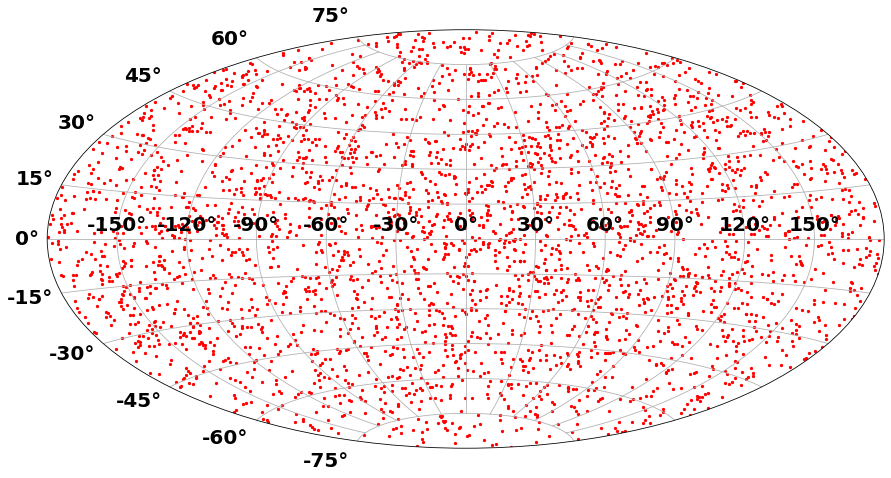

In [13]:
plt.close('all')
plt.figure(figsize=(15,15))

plt.subplot(projection='aitoff')
plt.grid(True)
plt.scatter(cat.ra.wrap_at('180d').radian, cat.dec.radian, s=5, c='red')
plt.show()

# NOTA
Me gustaría hacer el apartado extra, identificando en el catálogo las 10 fuentes de mayor emisión en rayos gamma. El problema es que no encuentro la equivalencia entre nombres de este radio-catálogo y el catálogo de FermiLat.

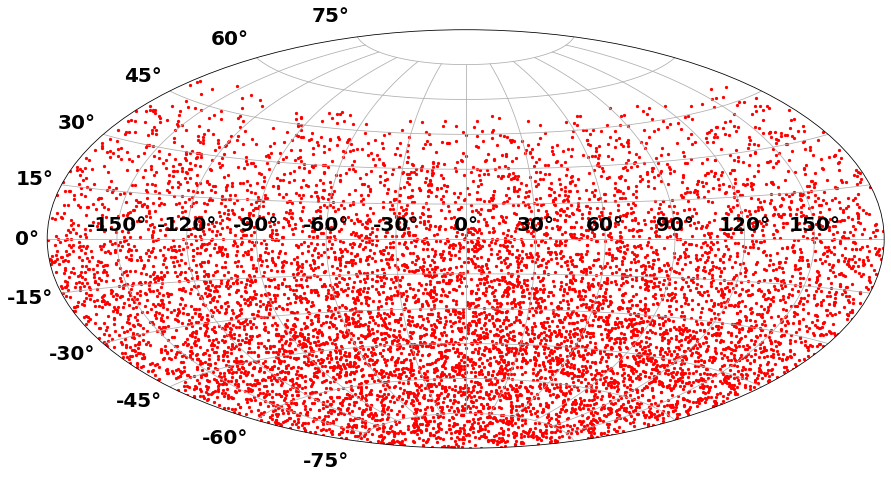

In [14]:
plt.close('all')
plt.figure(figsize=(15,15))

plt.subplot(projection='aitoff')
plt.grid(True)
plt.scatter(antares.ra.wrap_at('180d').radian, antares.dec.radian, s=5, c='red')
plt.show()

## Histogramas de las distribuciones

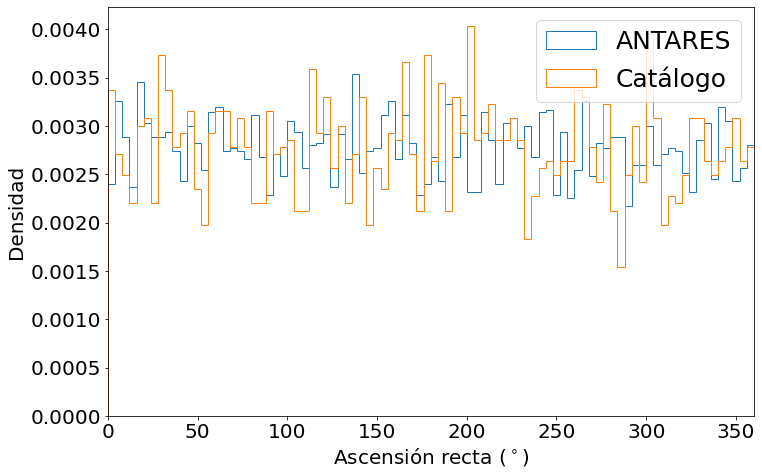

In [15]:
plt.rcParams.update({'font.weight':500})
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(antares.ra.to_value(), 
         bins = bins, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         label='ANTARES')

plt.hist(cat.ra.to_value(), 
         bins = bins, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         label='Catálogo')

plt.xlim(0,360)
plt.xlabel(r'Ascensión recta ($^\circ$)')
plt.ylabel(r'Densidad')
plt.legend(loc='upper right', fontsize = 25)
#plt.grid()
plt.tight_layout()

plt.show()

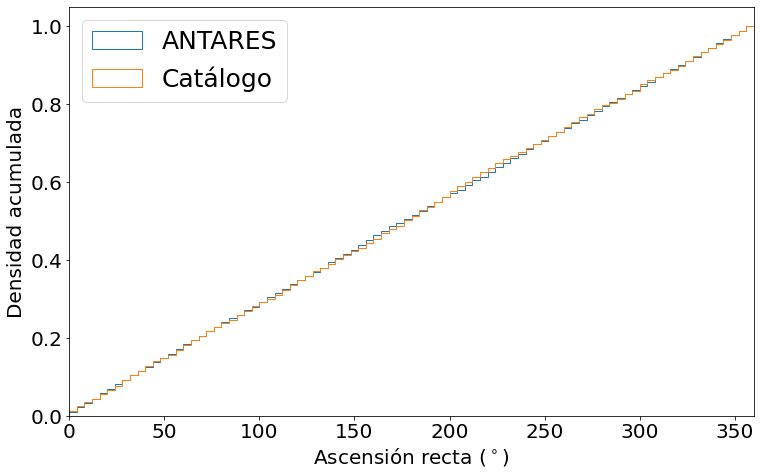

In [16]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(antares.ra.to_value(), 
         bins = bins, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         cumulative=True, 
         label='ANTARES')

plt.hist(cat.ra.to_value(), 
         bins = bins, 
         range=(0,360), 
         histtype='step', 
         density = True, 
         cumulative=True, 
         label='Catálogo')

plt.xlim(0,360)
plt.xlabel(r'Ascensión recta ($^\circ$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper left', fontsize = 25)
#plt.grid()
plt.tight_layout()

plt.show()

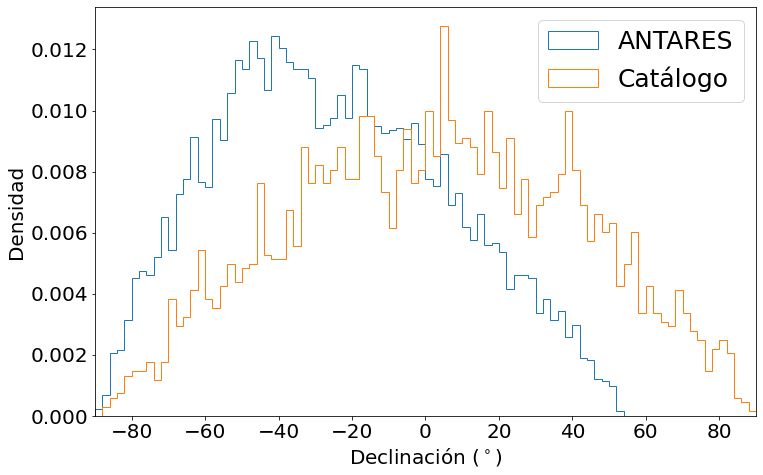

In [17]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(antares.dec.to_value(), 
         bins = bins, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         label='ANTARES')

plt.hist(cat.dec.to_value(), 
         bins = bins, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         label='Catálogo')

plt.xlim(-90,90)
plt.xlabel(r'Declinación ($^\circ$)')
plt.ylabel(r'Densidad')
plt.legend(loc='upper right', fontsize = 25)
plt.tight_layout()

plt.show()

## Saco la distribución de la Declinación para simular eventos con esta distribución

In [18]:
import scipy.stats
ant_dec_hist = np.histogram(antares.dec.to_value(), bins=90, range = (-90,90))
ant_dec_dist = scipy.stats.rv_histogram(ant_dec_hist)

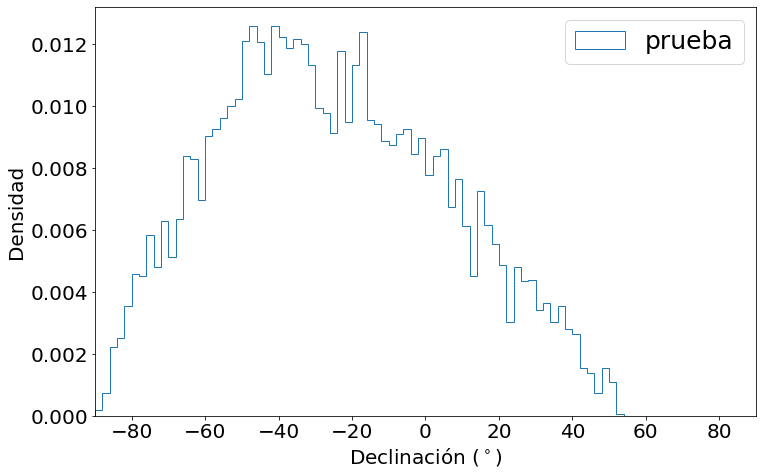

In [19]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(ant_dec_dist.rvs(size = len(antares)),
         bins = bins, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         label='prueba')

plt.xlim(-90,90)
plt.xlabel(r'Declinación ($^\circ$)')
plt.ylabel(r'Densidad')
plt.legend(loc='upper right', fontsize = 25)
plt.tight_layout()

plt.show()

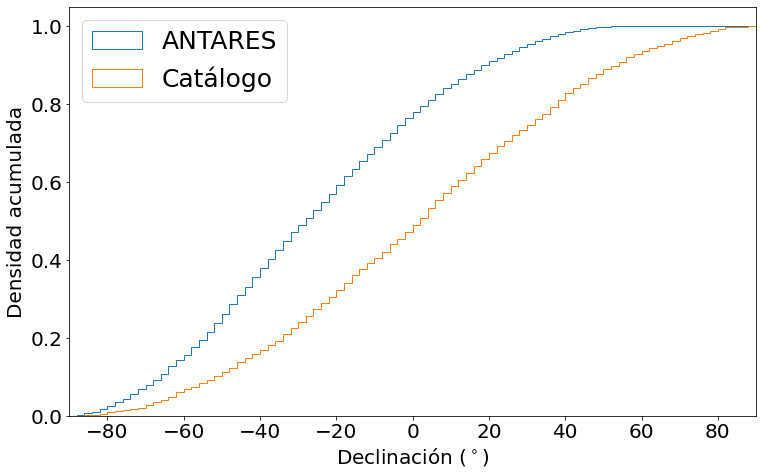

In [20]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(antares.dec.to_value(), 
         bins = bins, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         cumulative = True, 
         label='ANTARES')

plt.hist(cat.dec.to_value(), 
         bins = bins, 
         range=(-90,90), 
         histtype='step', 
         density = True, 
         cumulative = True, 
         label='Catálogo')

plt.xlim(-90,90)
plt.xlabel(r'Declinación ($^\circ$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.show()

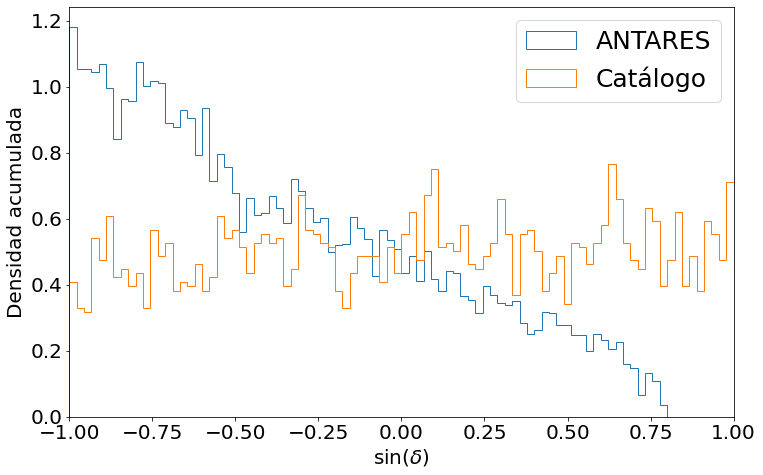

In [21]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(np.sin(antares.dec.radian), 
         bins = bins, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = False, 
         label='ANTARES')

plt.hist(np.sin(cat.dec.radian), 
         bins = bins, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = False, 
         label='Catálogo')

plt.xlim(-1,1)
plt.xlabel(r'sin($\delta$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper right', fontsize = 25)
plt.tight_layout()

plt.show()

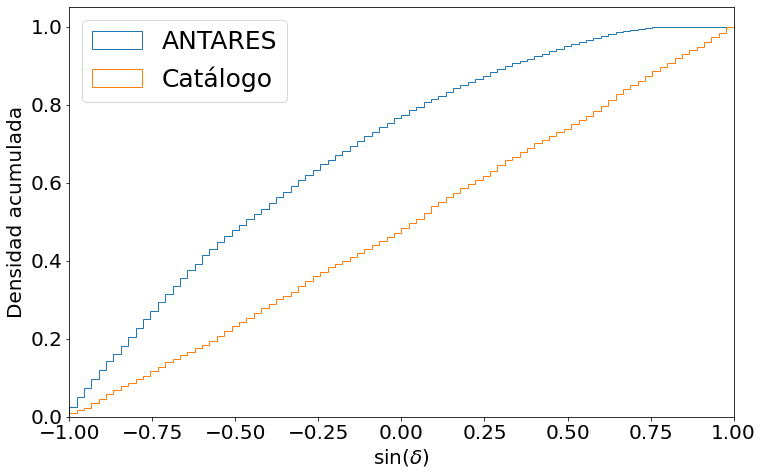

In [22]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(np.sin(antares.dec.radian), 
         bins = bins, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = True, 
         label='ANTARES')

plt.hist(np.sin(cat.dec.radian), 
         bins = bins, 
         range=(-1,1), 
         histtype='step', 
         density = True, 
         cumulative = True, 
         label='Catálogo')

plt.xlim(-1,1)
plt.xlabel(r'sin($\delta$)')
plt.ylabel(r'Densidad acumulada')
plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.show()

## Calculo las distancias con _search around sky_

Sólo son necesarias las distancias cortas, de modo que pongo un límite de 5º para ahorrar tiempo y potencia de cálculo. 

In [23]:
max_dist = 5.0
dist_ant_cat = (astropy.coordinates.search_around_sky(antares,cat,max_dist*astropy.units.deg))[2]

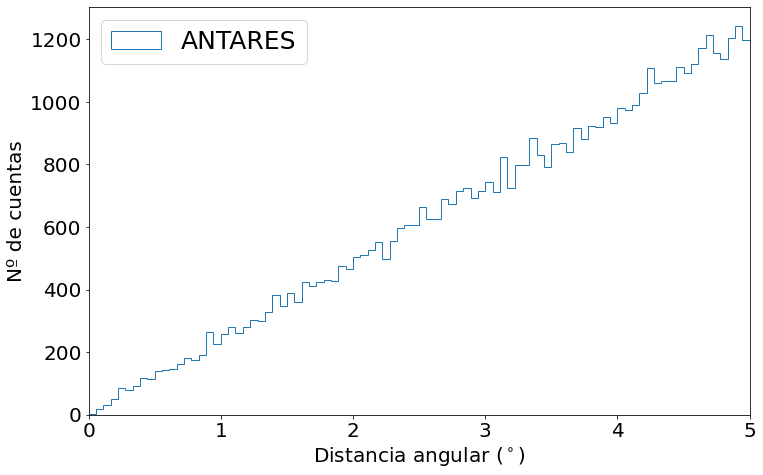

In [24]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(dist_ant_cat.deg, 
         bins = bins, 
         range=(0,max_dist), 
         histtype='step', 
         cumulative = False, 
         label='ANTARES')

plt.xlim(0,max_dist)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Nº de cuentas')

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.show()

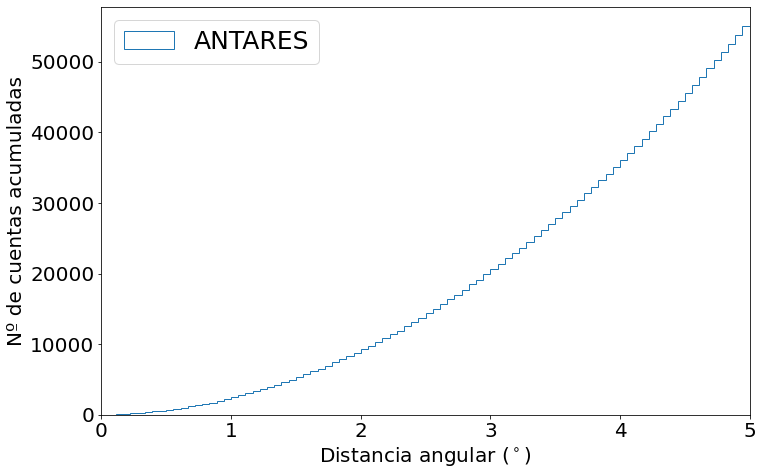

In [25]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
ant_bins = plt.hist(dist_ant_cat.deg, 
                    bins = bins, 
                    range=(0,max_dist), 
                    histtype='step', 
                    cumulative = True, 
                    label='ANTARES')

plt.xlim(0,max_dist)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Nº de cuentas acumuladas')

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.show()

## Genero los pseudo-experimentos

In [26]:
import random

In [48]:
exp = []
Nexp = 2

for _ in range(Nexp):
    ra = np.random.rand(len(antares))*360.0
    dec = ant_dec_dist.rvs(size = len(antares))
    exp.append(astropy.coordinates.SkyCoord(ra*astropy.units.deg, dec*astropy.units.deg))

## Calculo las distancias entre el catálogo y los pseudo-experimentos

In [53]:
import multiprocessing
import time
from datetime import timedelta

def paralel_dist(exp):
    return astropy.coordinates.search_around_sky(exp,cat,max_dist*astropy.units.deg)[2].deg

if CLUSTER:
    t = time.time()
    cores = 2 #(multiprocessing.cpu_count())
    print('Counted cores:', cores)
    # Open a new pool
    pool = multiprocessing.Pool(processes=cores) 
    # Loop the par_read function thought all the files in the i2ascii-files/ directory
    dr = pool.map(paralel_dist, exp)
    pool.close() 
    pool.join()    
    print('Time:', timedelta(seconds=time.time()-t), '\n')
    
    dist_random = np.empty(0)
    for i in dr:
        dist_random = np.append(dist_random,i)

else:
    t = time.time()
    dist_random = np.empty(0)
    for i in exp:
        dist_random = np.append(dist_random, astropy.coordinates.search_around_sky(i,cat,max_dist*astropy.units.deg)[2].deg)

    print('Time:', timedelta(seconds=time.time()-t), '\n')
    print(dist_random.shape)

Counted cores: 2
Time: 0:00:00.135109 



## Dibujo la distribución acumuladad de las distancias entre el catálogo y los pseudo-experimentos

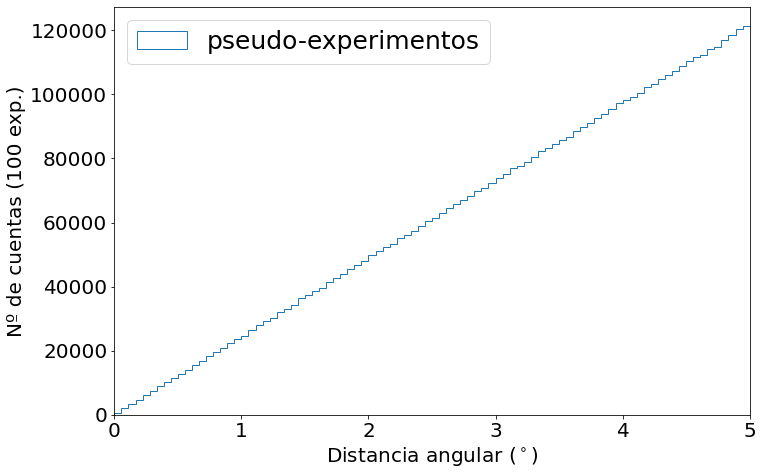

In [30]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
plt.hist(dist_random, 
         bins = bins, 
         range=(0,max_dist), 
         histtype='step', 
         cumulative = False, 
         label='pseudo-experimentos')

plt.xlim(0,max_dist)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Nº de cuentas ({} exp.)'.format(Nexp))

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.show()

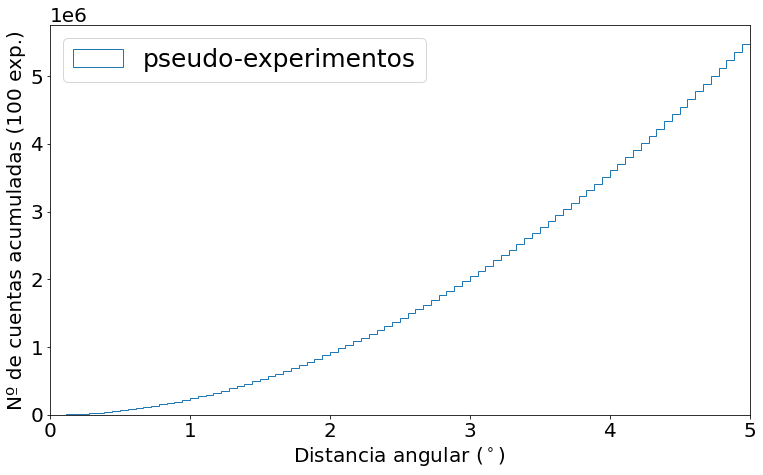

In [31]:
plt.close('all')
plt.figure(figsize=(11,7))

bins = 90
rnd_bins = plt.hist(dist_random, 
                    bins = bins, range=(0,max_dist), 
                    histtype='step', 
                    cumulative = True, 
                    label='pseudo-experimentos')
plt.xlim(0,max_dist)
#plt.ylim(0,1e6)
plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Nº de cuentas acumuladas ({} exp.)'.format(Nexp))

plt.legend(loc='upper left', fontsize = 25)
plt.tight_layout()

plt.show()

## Calculo de los residuos y significancias

In [32]:
# Divido por el numero de experimentos los bines de los pseudoexperimentos
residuos = ant_bins[0]-(rnd_bins[0]/Nexp)
#significancias = residuos/(rnd_bins[0]/Nexp)
significancias = ant_bins[0]/(rnd_bins[0]/Nexp)-1

# Para las distancias, obtengo el punto medio de los bines ( (punto final + punto inicial) / 2.0 )
distancias = (ant_bins[1][:-1]+ant_bins[1][1:])/2.0

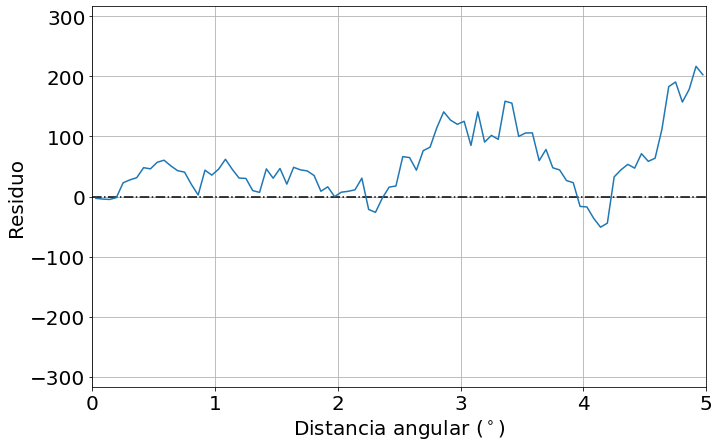

In [33]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.plot(distancias,residuos)
plt.hlines(0, 0, max_dist, linestyles='dashdot', color='black')

plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Residuo')

maximo = max(abs(residuos))

plt.xlim(0,max_dist)
plt.ylim(-maximo-100,maximo+100)
plt.grid()

plt.show()

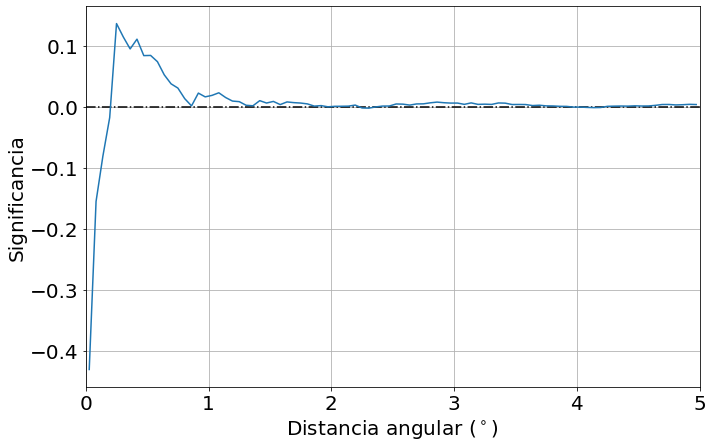

In [34]:
plt.close('all')
plt.figure(figsize=(11,7))

plt.plot(distancias,significancias)
plt.hlines(0, 0, max_dist, linestyles='dashdot', color='black')

plt.xlabel(r'Distancia angular ($^\circ$)')
plt.ylabel(r'Significancia')

plt.xlim(0,max_dist)
#plt.ylim(-5000,5000)
plt.grid()

plt.show()

## GENERO UN PSEUDO-EXPERIMENTO, CALCULO SU DISTANCIA AL CATALOGO, Y HAGO COMO SI ÉSTE FUERAN LOS DATOS DE ANTARES, COJO EL MAXIMO DE SIGNIFICANCIA Y REPITO.